# Lending Club Case Study

#### This case study is used to identify the predictor variables for loan defaults.

### 1. Data Understanding and Cleaning

In [114]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chardet


In [115]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Option in pandas to show max columns in head
pd.set_option('max_columns',None)

In [117]:
# Validating the encoding for the loan dataset
with open('loan.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(39717))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [118]:
# Loading the dataset with utf-8 encoding as it is compatible with ASCII
loan = pd.read_csv('loan.csv',encoding = 'utf-8')

In [119]:
print(loan.shape)
loan.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [120]:
# Removing the rows where borrowers loan status is Current
loan = loan[loan.loan_status != 'Current']

In [121]:
# Pecentage of  null values
(loan.isnull().sum()/len(loan.index)).sort_values(ascending=False).head(70)

total_il_high_credit_limit    1.000000
il_util                       1.000000
bc_util                       1.000000
bc_open_to_buy                1.000000
avg_cur_bal                   1.000000
                                ...   
tax_liens                     0.001011
title                         0.000285
last_credit_pull_d            0.000052
purpose                       0.000000
verification_status           0.000000
Length: 70, dtype: float64

In [122]:
# Drop all the columns having all the values as null
loan.dropna(axis = 1,how = 'all',inplace = True)



In [123]:
# Pecentage of  null values
(loan.isnull().sum()/len(loan.index)).sort_values(ascending=False).head(15)

mths_since_last_record        0.928973
mths_since_last_delinq        0.645592
desc                          0.324727
emp_title                     0.061850
emp_length                    0.026778
pub_rec_bankruptcies          0.018068
last_pymnt_d                  0.001840
chargeoff_within_12_mths      0.001452
collections_12_mths_ex_med    0.001452
revol_util                    0.001296
tax_liens                     0.001011
title                         0.000285
last_credit_pull_d            0.000052
int_rate                      0.000000
purpose                       0.000000
dtype: float64

In [124]:
# Removing the columns having more than 30 % of null values
loan.dropna(axis = 1, thresh=len(loan) * 0.7, inplace=True)


In [125]:
# Pecentage of  null values
(loan.isnull().sum()/len(loan.index)).sort_values(ascending=False).head(10)

emp_title                     0.061850
emp_length                    0.026778
pub_rec_bankruptcies          0.018068
last_pymnt_d                  0.001840
collections_12_mths_ex_med    0.001452
chargeoff_within_12_mths      0.001452
revol_util                    0.001296
tax_liens                     0.001011
title                         0.000285
last_credit_pull_d            0.000052
dtype: float64

In [126]:
# Considering the objective and to avoid loss of data, imputing the mode value for all the null values of the  emp_title  
loan.emp_title.fillna(loan.emp_title.mode()[0],inplace=True)

In [127]:
# As the total null values constitute less than 5 %, drop all the rows having any null values
loan.dropna(axis = 0,how= 'any', inplace = True)

In [128]:
# Check for the columns having only one unique value
columns_with_one_uniquevalue = loan.nunique()[loan.nunique().values == 1]

In [129]:
# Removing the columns having only one unique value
loan.drop(columns = columns_with_one_uniquevalue.index.values, axis = 1, inplace = True)

In [130]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [131]:
# Removing the columns url, zip_code, id, member_id as they are useful for analysis
loan.drop(columns = ['url','zip_code','id','member_id'], axis = 1, inplace=True)

In [132]:
# Total rows available after data cleaning
len(loan.index)/39717


0.9246670191605609

In [133]:
loan.shape

(36725, 38)

In [134]:
loan.reset_index(drop = True, inplace=True)

####  Around ninety two percent of the total rows are available after peforming the data cleaning process. Total 36725 rows are available for data analysis.

#### Target variable for the default loan predictor dataset is `Loan_status`

#### Manipulation of Interest Rate

In [135]:
# Renaming the interest and revol_util column names for analysis
loan.rename(columns = {'int_rate': 'int_rate(%)','revol_util':'revol_util(%)'},inplace=True)

In [136]:
# Coverting the types to float
loan['int_rate(%)'] = loan['int_rate(%)'].apply(lambda x: float(x.rstrip('%')))

#### Removing Outliers in Annual Income

In [137]:
loan.annual_inc.describe()


count    3.672500e+04
mean     6.947365e+04
std      6.407095e+04
min      4.000000e+03
25%      4.123500e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [138]:
# Value of 99 percentile
loan.annual_inc.quantile(0.99)

235000.0

In [139]:
# Checking the ratio of 100 and 99 percentiles
loan.annual_inc.quantile(1)/loan.annual_inc.quantile(.99)

25.53191489361702

#### As the ratio of 100 and 99 percentiles is too large and equal to 25 removing the records of more than 99 percentile

In [140]:
loan = loan[loan.annual_inc <= loan.annual_inc.quantile(0.99)]

### 2. Data Analysis 

In [141]:
# All the columns in the loan data frame
print(*loan.columns,sep='\n')

loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate(%)
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
title
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util(%)
total_acc
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
pub_rec_bankruptcies


#### Firstly, identify the Consumer and Loan attributes for analysis:

#### Consumer Attributes:
* emp_length
* home_ownership
* annual_inc
* dti
* addr_state


#### Loan Attributes:
* loan_amnt
* funded_amnt
* funded_amnt_inv
* term
* int_rate
* installment
* grade
* sub_grade
* verification_status
* issue_d
* loan_status
* purpose

#### Ignoring the below columns for analysis as they depend on customer behavoiour after approving the loan
* out_prncp
* total_pymnt
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* delinq_2yrs
* earliest_cr_line
* inq_last_6mths
* open_acc
* pub_rec
* revol_bal
* revol_util
* total_acc
* out_prncp_inv
* total_pymnt_inv
* last_credit_pull_d
* pub_rec_bankruptcies


#### Derived variables
* Percentage of loan amount w.r.t annual income (loan_amnt/annual_inc)
* Year of loan issued from issue_d
* Binning of loan Amount
* Binning of Interest rates
* Binning of Annual Income

#### Removing the unwanted columns for ease of analysis

In [142]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate(%)',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util(%)', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [143]:
loan.drop(columns =list(loan.columns[19:]), inplace=True)

#### Deriving year from Issue date

In [144]:
import datetime

In [145]:
# Creating the derived column for the issue_date using the 'strptime' datetime method

loan['year_issued'] = loan.issue_d.apply(lambda x: datetime.datetime.strptime(x, '%b-%y').year)

#### Deriving the loan amount to annual income ratio

In [146]:
loan['loan_amt/ann_inc'] = loan.loan_amnt/loan.annual_inc

#### Deriving bins for Loan Amount

In [147]:
# Check the max value for binning
loan.loan_amnt.max()

35000

In [148]:
# Create bins, labels for the segmentation

bins = [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']

# Using pd.cut method for binning
loan['loan_range'] = pd.cut(loan.loan_amnt,bins,labels=labels)



#### Deriving Bins for Interest Rate

In [149]:
# Check the max value for binning
loan['int_rate(%)'].max()

24.4

In [150]:
# Create bins, labels for the segmentation

bins = [0,5,10,15,20,25]
labels = ['0 - 5','5 - 10','10 - 15','15 - 20','20 - 25']

# Using pd.cut method for binning
loan['interest_range'] = pd.cut(loan['int_rate(%)'],bins,labels = labels)

#### Deriving Bins for Loan to Annual Income ratio


In [151]:
loan['loan_amt/ann_inc'].max()

0.819672131147541

In [152]:
# Create bins, labels for the segmentation

bins = [0,0.5,1]
#labels = ['0 - 0.5','0.25 - 0.5','0.5 - 0.75','0.75 - 1']
labels = ['0 - 0.5','0.5 - 1']

# Using pd.cut method for binning
loan['loan_amt/ann_inc_range'] = pd.cut(loan['loan_amt/ann_inc'],bins,labels = labels)

#### Deriving Bins for Annual Income

In [153]:
# Check the max value for binning
loan.annual_inc.max()

235000.0

In [154]:
# Create bins, labels for the segmentation of annual amount
bins = []
labels = []
# Creation of bins with a difference of 20000 from 0 t0 240000
for i in range(0,240001,20000):
    bins.append(i)

# Creation of labels with interval 20000 min 0 and max 240000
for i in range(len(bins)-1):
    lbl = str(bins[i]) + ' - ' + str(bins[i+1]) 
    labels.append(lbl)

# Using pd.cut method for binning
loan['annual_inc_range'] = pd.cut(loan.annual_inc,bins,labels=labels)

#print(labels)
#bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000]
#labels = ['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-140000','140000 - 160000','160000 - 180000','180000 - 200000','200000 - 220000','220000 - 240000']


#### Deriving Bins for dti

In [155]:
# Check the max value for binning
loan.dti.max()

29.99

In [156]:
# Create bins, labels for the segmentation
bins = [0,5,10,15,20,25,30]
labels = ['0 - 5','5 - 10','10 - 15','15 - 20','20 - 25','25 - 30']

# Using pd.cut method for binning dti values
loan['dti_range'] = pd.cut(loan['dti'],bins,labels = labels)

#### Coversion of loan Status to Numerical values 0 (Fully Paid) and 1(Charged Off)

In [157]:
loan.loan_status.value_counts()

Fully Paid     31200
Charged Off     5164
Name: loan_status, dtype: int64

In [158]:
# Applying function to loan status to change the values to numerical
loan.loan_status = loan.loan_status.apply(lambda x: 0 if x == 'Fully Paid'else 1)

In [159]:
# Type check
loan.loan_status.dtype

dtype('int64')

In [160]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [161]:
# Common function for plot patches and adjusting x axis labels
def patch_func(plot,orient,adjust_val,denominator,percentage,adjust_x_labels = False,patch_work = True):
    annotate_string = '{:.0f}'
    if(percentage == True):
        annotate_string += '%'
    if(patch_work):
        for p in plot.patches:
            plot.annotate(annotate_string.format(p.get_height()*100/denominator), (p.get_x()+adjust_val, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
            
    if(adjust_x_labels):
        for item in plot.get_xticklabels():
            item.set_rotation(45)
            
    return plot
    

In [162]:
# Common Function used for plotting the distribution, bar and countplots for Univcariate and Bivariate Aalysis
def plot_func(plotfor, xcolumn, ycolumn, hist, xlabel, ylabel,hue,percentvalues,adjust_per_val,order,rateplot,adjust_x_labels = False):
    plt.style.use('fivethirtyeight')
    sns.set_style('whitegrid')
    if(plotfor == 'num'):
        fig,axes = plt.subplots(1,2,figsize = [12,4])
        dist_plot = sns.distplot(xcolumn,hist = hist,bins = 100,ax = axes[0])
        axes[0].set_xlabel(xlabel)
        axes[0].set_title('Distribution Plot')
        box_plot = sns.boxplot(xcolumn,ax = axes[1])
        axes[1].set_xlabel(xlabel)
        axes[1].set_title('Box Plot')
    elif(plotfor == 'cat'):
        plt.figure(figsize = [15,5])
        bar_plot = sns.barplot(x = xcolumn , y = ycolumn, ci = None, hue = hue,order = order)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Bar Plot')
        if((percentvalues == True) & (rateplot == False)):
            patch_func(bar_plot,'v',adjust_per_val,len(loan),True,adjust_x_labels)
                
        elif((percentvalues == True) & (rateplot == True)):
            patch_func(bar_plot,'v',adjust_per_val,1,True,adjust_x_labels)
            
        elif((percentvalues == False) & (rateplot == True)):
            patch_func(bar_plot,'v',adjust_per_val,1,False,adjust_x_labels,False)
            
                        
            
    else:
        plt.figure(figsize = [18,5])
        count_plot = sns.countplot(x = xcolumn,hue = hue)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Count Plot')
        if type(hue)() is None:
            if(percentvalues != True):
                patch_func(count_plot,'v',adjust_per_val,100,False,adjust_x_labels)
                #for p in count_plot.patches:
                #    count_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()),
                #    ha='center', va='bottom',
                #    color= 'black')
            else:
                patch_func(count_plot,'v',adjust_per_val,len(loan),True,adjust_x_labels)
                #for p in count_plot.patches:
                #    count_plot.annotate('{:.0f}%'.format(p.get_height()*100/len(loan)), (p.get_x()+0.35, p.get_height()),
                #    ha='center', va='bottom',
                #    color= 'black')
        else:
            if(percentvalues != True):
                patch_func(count_plot,'v',adjust_per_val,100,False,adjust_x_labels)
                #for p in count_plot.patches:
                #    count_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
                #    ha='center', va='bottom',
                #    color= 'black')
            else:
                plot_func(count_plot,'v',adjust_per_val,len(loan),True,adjust_x_labels)
                #for p in count_plot.patches:
                #    count_plot.annotate('{:.0f}%'.format(p.get_height()*100/len(loan)), (p.get_x()+0.35, p.get_height()),
                #    ha='center', va='bottom',
                #    color= 'black')
    
        
        


    

#### Univariate Analysis

#### 1. Interest Rate

In [163]:
loan['int_rate(%)'].describe()

count    36364.000000
mean        11.965913
std          3.693627
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate(%), dtype: float64

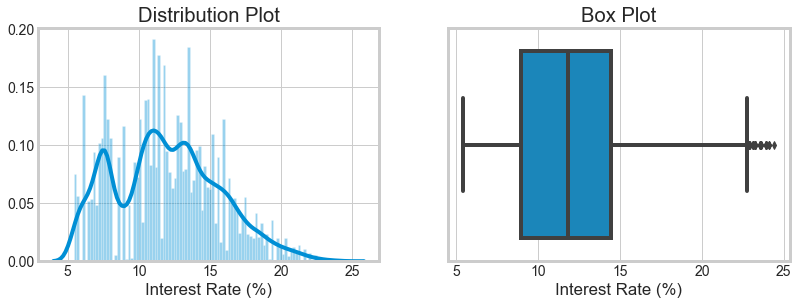

In [164]:
# Distribution Plot and bar plot to see the distribution of interest rates
plot_func('num',loan['int_rate(%)'],None,True,'Interest Rate (%)',None,None,None,None,None,False)



In [165]:
print(loan['int_rate(%)'].quantile(0.25),loan['int_rate(%)'].quantile(0.75))

8.94 14.46


#### Majority of the interest distribution is in 9 - 14.5%

#### 2. Loan Amount

In [166]:
loan.loan_amnt.describe()

count    36364.000000
mean     11068.501815
std       7285.940903
min        500.000000
25%       5500.000000
50%       9900.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

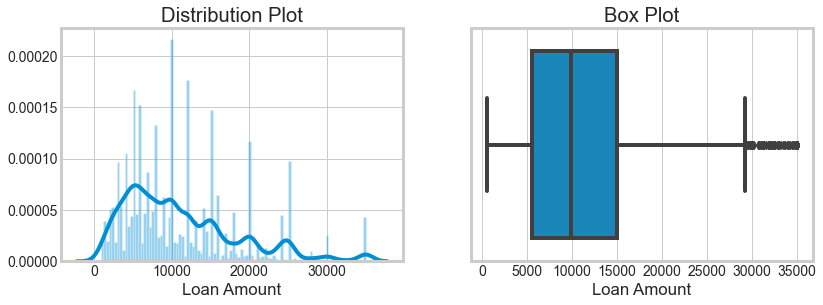

In [167]:
# Distribution and bar plots for Loan Amount
plot_func('num',loan.loan_amnt,None, True, 'Loan Amount', None,None,None,None,None,False)

#### Most of the loan amount is distributed between 5000 to 15000

#### 4. Employee Length

In [168]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate(%),installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,year_issued,loan_amt/ann_inc,loan_range,interest_range,loan_amt/ann_inc_range,annual_inc_range,dti_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,Computer,AZ,27.65,2011,0.208333,0-5000,10 - 15,0 - 0.5,20000 - 40000,25 - 30
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,bike,GA,1.00,2011,0.083333,0-5000,15 - 20,0 - 0.5,20000 - 40000,0 - 5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,real estate business,IL,8.72,2011,0.195886,0-5000,15 - 20,0 - 0.5,0 - 20000,5 - 10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,personel,CA,20.00,2011,0.203252,5000-10000,10 - 15,0 - 0.5,40000 - 60000,15 - 20
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,0.138889,0-5000,5 - 10,0 - 0.5,20000 - 40000,10 - 15


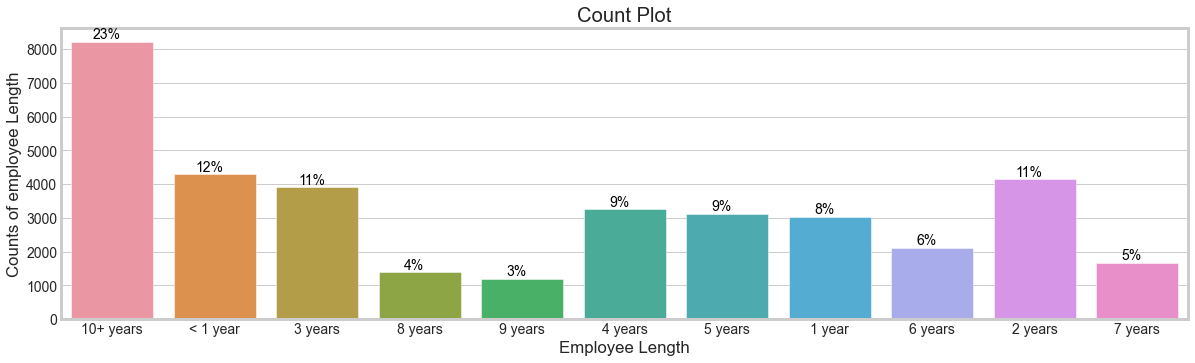

In [169]:
# Count Plot for Employee Length
plot_func('count',loan.emp_length,None,None,'Employee Length', 'Counts of employee Length',None,True,0.35,None,None)

#### Majority of the loans are borrowed by members with employement length more than 10 years

#### 5. Year

In [170]:
loan.year_issued.value_counts()

2011    19566
2010    11057
2009     4637
2008     1099
2007        5
Name: year_issued, dtype: int64

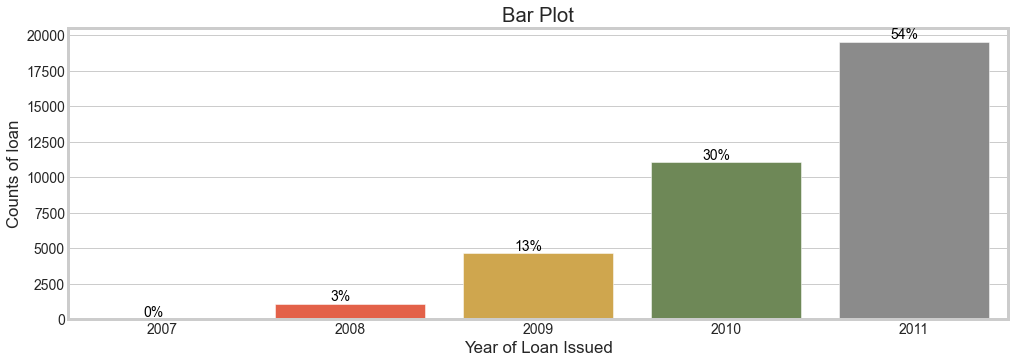

In [171]:
# Using group by for year wise counts
groupby = loan.groupby('year_issued')['loan_amnt'].count()

# Converting the counts to a data frame
groupbyframe = pd.DataFrame(groupby)

# Using bar plot for the year wise counts
plot_func('cat',groupbyframe.index,groupbyframe.loan_amnt,None,'Year of Loan Issued','Counts of loan',None,True, 0.35,None,False)

#### Majority of the loans are issued in the year 2011 and the application count is increasing rapidly every year.

#### 6. Term

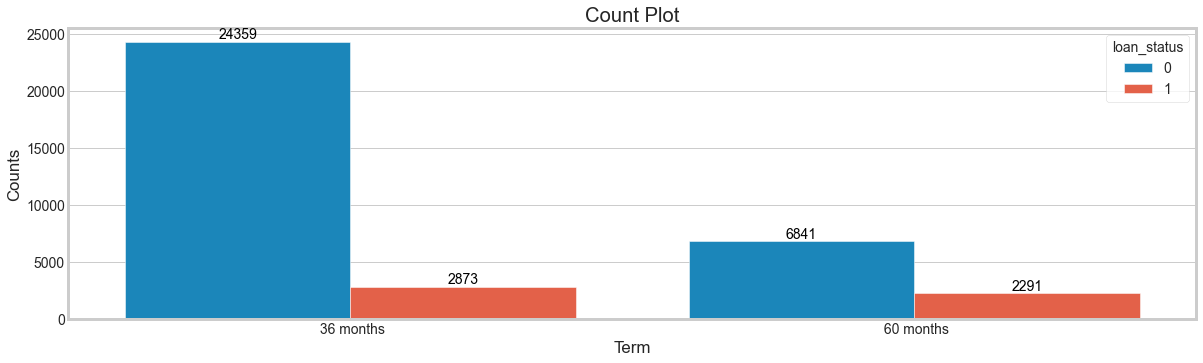

In [172]:
# Count plot for Term
plot_func('count',loan.term,None,None,'Term','Counts',loan.loan_status,False,0.2,None,None)

#### Majority of people prefrerring the 36 months term

#### 7. Home Ownership

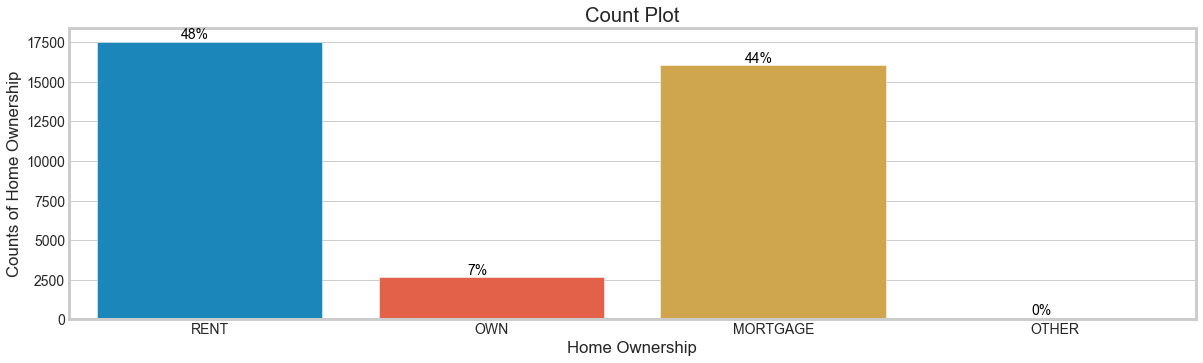

In [173]:
# Count plot for home Ownership
plot_func('count',loan.home_ownership,None,None,'Home Ownership','Counts of Home Ownership',None,True,0.35,None,None)

#### Majority of people borrowing the loan have home Ownership as RENT and MORTGAGE.

#### 8. Loan  Status

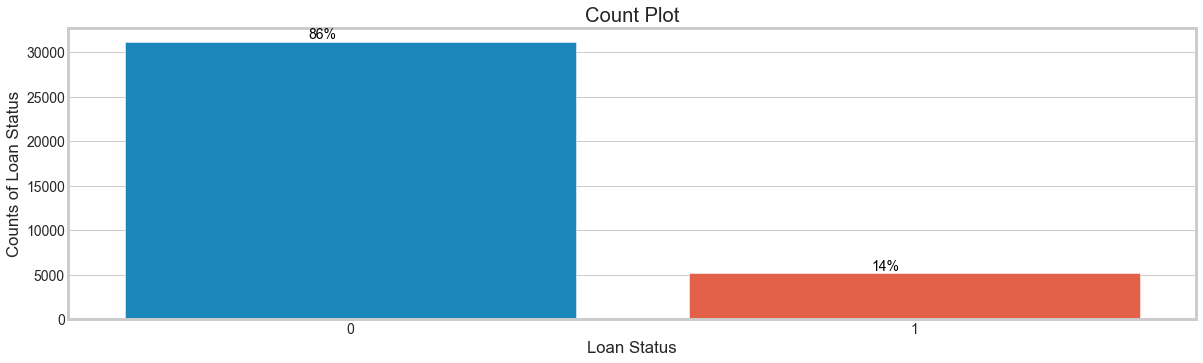

In [174]:
# Count plot for loan status
plot_func('count',loan.loan_status,None,None,'Loan Status','Counts of Loan Status', None,True,0.35,None,False)

#### About 14% of the borrowers are charged Off out of total applicants

#### 9. Annual Income

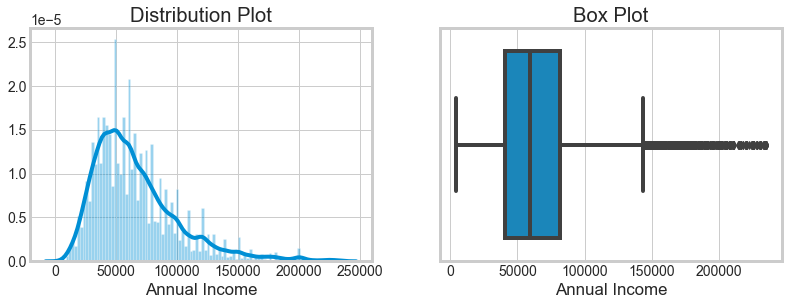

In [175]:
# Distribution and box plots for Annual income to see the distribution of data
plot_func('num',loan.annual_inc,None,True,'Annual Income',None,None,None,None,None,False)

In [176]:
print(loan.annual_inc.quantile(0.25),loan.annual_inc.quantile(0.75),sep = '\n')

41000.0
82000.0


#### Majority of the borrowers earnings is in the 41000 - 82000 range

In [177]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate(%),installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,year_issued,loan_amt/ann_inc,loan_range,interest_range,loan_amt/ann_inc_range,annual_inc_range,dti_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,Computer,AZ,27.65,2011,0.208333,0-5000,10 - 15,0 - 0.5,20000 - 40000,25 - 30
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,bike,GA,1.00,2011,0.083333,0-5000,15 - 20,0 - 0.5,20000 - 40000,0 - 5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,real estate business,IL,8.72,2011,0.195886,0-5000,15 - 20,0 - 0.5,0 - 20000,5 - 10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,personel,CA,20.00,2011,0.203252,5000-10000,10 - 15,0 - 0.5,40000 - 60000,15 - 20
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,0.138889,0-5000,5 - 10,0 - 0.5,20000 - 40000,10 - 15


In [178]:
loan.purpose.value_counts()

debt_consolidation    17207
credit_card            4759
other                  3556
home_improvement       2655
major_purchase         2030
small_business         1621
car                    1422
wedding                 880
medical                 638
moving                  535
vacation                341
house                   338
educational             291
renewable_energy         91
Name: purpose, dtype: int64

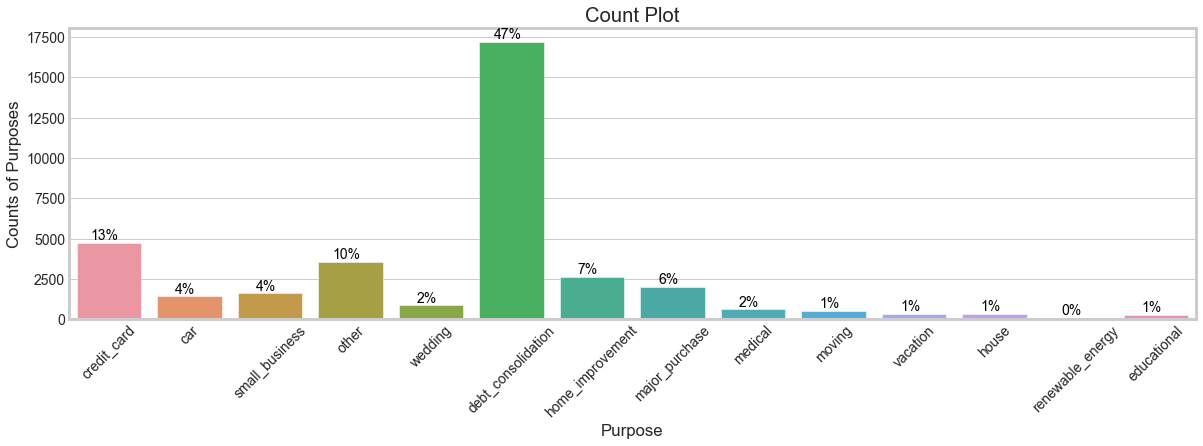

In [179]:
# Count Plot for purpose
plot_func('count',loan.purpose,None,None,'Purpose','Counts of Purposes',None,True,0.35,None,False,True)

#### Majority of the loans are applied for debt_consolidation

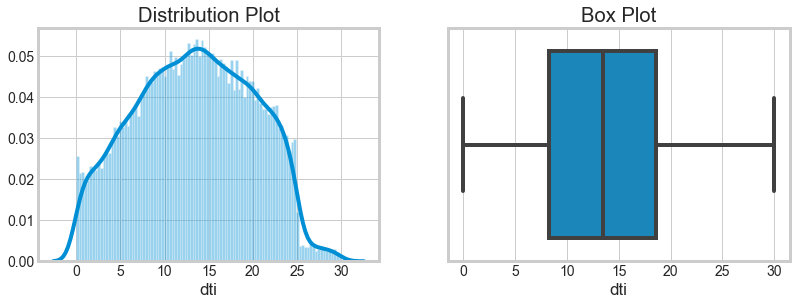

In [180]:
# Distribution and bar plots for dti
plot_func('num',loan.dti,None,True,'dti',None,None,False,None,None,False)

In [181]:
print(loan.dti.quantile(0.25),loan.dti.quantile(0.75))

8.31 18.63


#### Majority of the loan distribution is in between 8.3 to 18.6

### Plots for Univariate Analyisis for Empirical probability of defaults

#### 1. Probability of Charged Off based on Grade and Sub_Grade

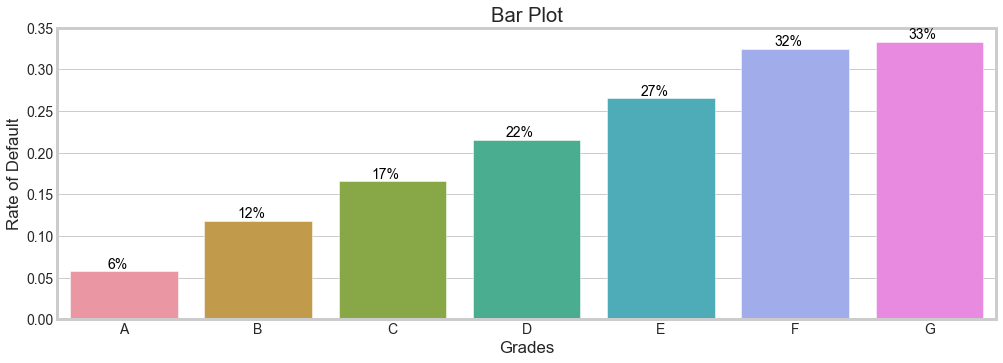

In [182]:
# Rate Of Default based on grade
order = sorted(list(loan.grade.unique()))
plot_func('cat',loan.grade,loan.loan_status,False,'Grades','Rate of Default',None,True,0.35,order,True)

#### Grades G and F have the highest percentage of defaults with 33 and 32% respectively.
#### Range of rates of default = 33 - 6 = 27%

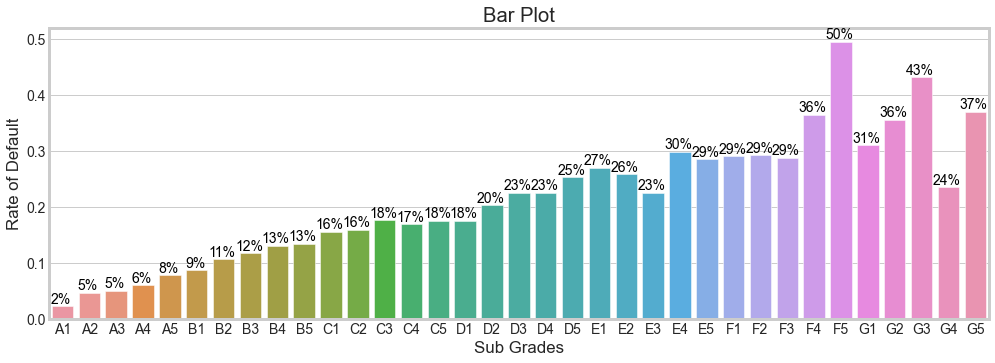

In [183]:
# Rate Of Default based on Sub grade
order = sorted(list(loan.sub_grade.unique()))
plot_func('cat',loan.sub_grade,loan.loan_status,False,'Sub Grades','Rate of Default',None,True,0.35,order,True)

#### Rate of default based on the grades and Sub grades is as follows : A<B<C<D<E<F<G. So Borrower with loan grade 'G' have high chances of default.

#### Range of rates of default = 50 - 2 = 48%
                                           

#### 2. Probability of Charged Off based on state

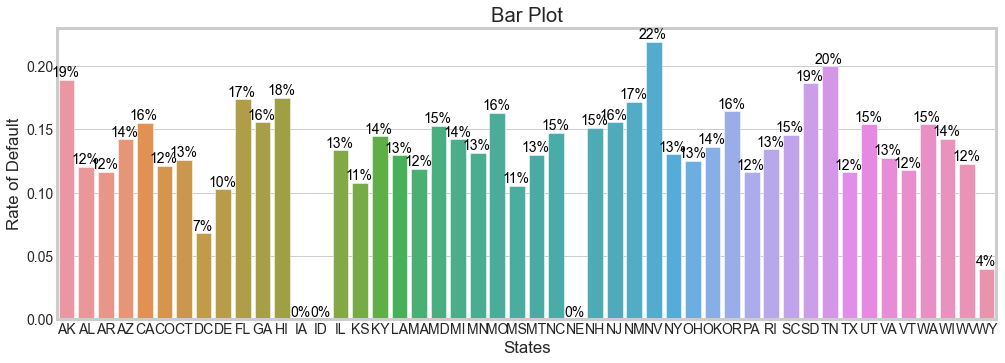

In [184]:
# Rate Of Default based on state
order = sorted(list(loan.addr_state.unique()))
plot_func('cat',loan.addr_state,loan.loan_status,False,'States','Rate of Default',None,True,0.35,order,True)

#### The state Nevada(NV) has highest Charged off borrower percentage followed by Tennessee (TN)
#### Range of rates of default = 22 - 0 = 22%

#### 3.Probability of Charged Off based on the loan amount
*   To calcualte the probabitlty of Charged Off based on loan amount, we have to first make the loan amount as a categorical variable

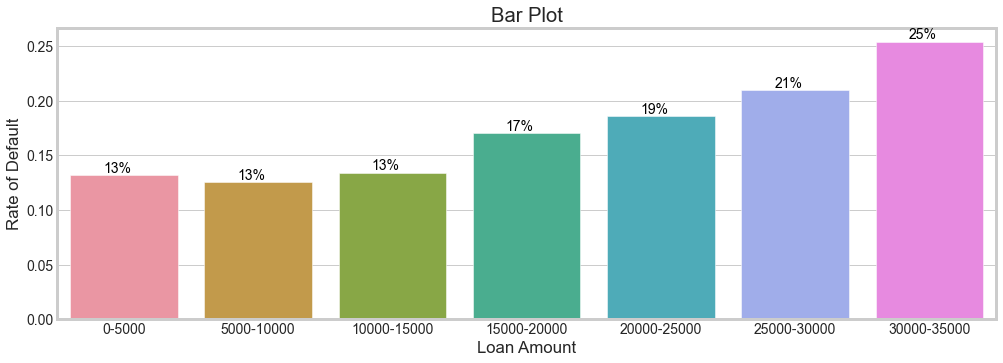

In [185]:
# Rate Of Default based on state
plot_func('cat',loan.loan_range,loan.loan_status,False,'Loan Amount','Rate of Default',None,True,0.35,None,True)

#### The borrowers having the loan amount within range 30000 - 35000 have the highest chance of being Charged Off
#### Range of rates of default = 25 - 13 = 12%

#### 4. Probabililty of charged Off based on Interest rate
*  To calcualte the probabitlty of Charged Off based on Interest Rate, we have to first make the interest rate as a categorical variable


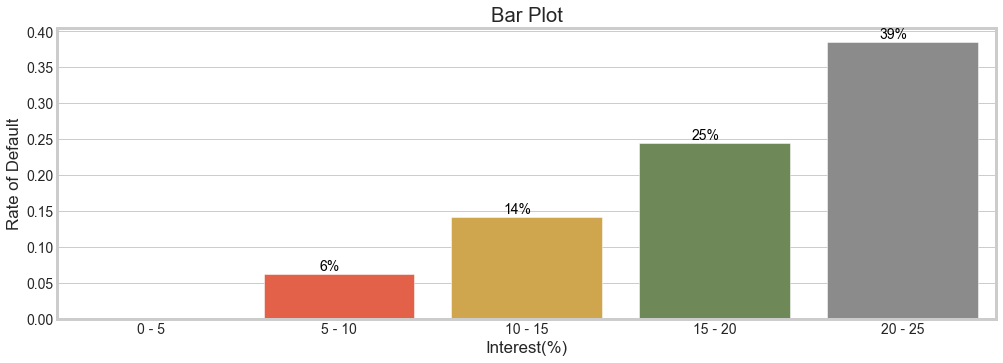

In [186]:
# Rate Of Default based on state
plot_func('cat',loan.interest_range,loan.loan_status,False,'Interest(%)','Rate of Default',None,True,0.35,None,True)

#### From the above plot, 39% of borrowers who borrowed the loan at the interest rate ranging 20-25 are defaulted. So the chances of default in interest range 20 - 25 is high.
#### Range of rates of default = 39%

#### 5. Probabiltity of charged Off based on Purpose

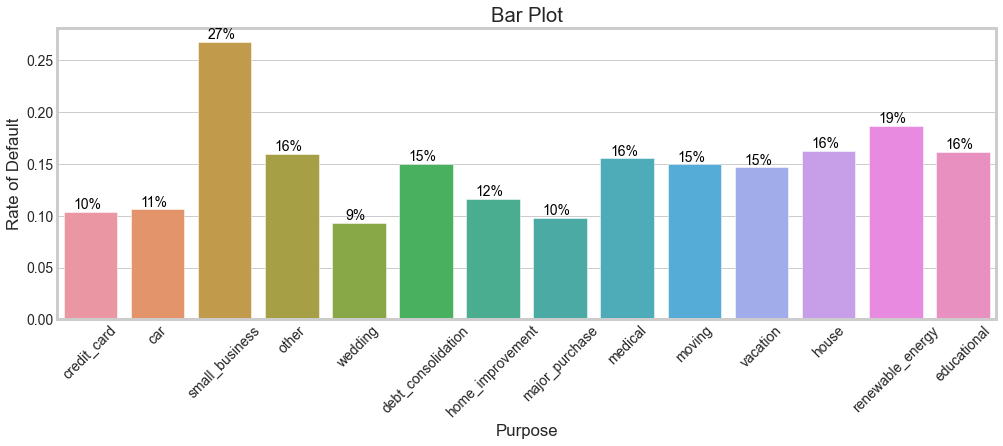

In [187]:
# Rate Of Default based on Sub grade
plot_func('cat',loan.purpose,loan.loan_status,False,'Purpose','Rate of Default',None,True,0.35,None,True,True)

#### Borrowers for the purpose of small business has the highest (25%) chance of default 
#### Range of rates of default = 27 - 9 = 18%

In [188]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate(%),installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,year_issued,loan_amt/ann_inc,loan_range,interest_range,loan_amt/ann_inc_range,annual_inc_range,dti_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,Computer,AZ,27.65,2011,0.208333,0-5000,10 - 15,0 - 0.5,20000 - 40000,25 - 30
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,bike,GA,1.00,2011,0.083333,0-5000,15 - 20,0 - 0.5,20000 - 40000,0 - 5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,real estate business,IL,8.72,2011,0.195886,0-5000,15 - 20,0 - 0.5,0 - 20000,5 - 10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,personel,CA,20.00,2011,0.203252,5000-10000,10 - 15,0 - 0.5,40000 - 60000,15 - 20
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,0.138889,0-5000,5 - 10,0 - 0.5,20000 - 40000,10 - 15


In [189]:
loan.shape

(36364, 26)

In [190]:
loan.dti.value_counts()

0.00     143
18.00     40
12.00     40
19.20     39
13.20     38
        ... 
25.25      1
26.99      1
27.42      1
27.69      1
28.92      1
Name: dti, Length: 2848, dtype: int64

#### 5. Probabiltity of charged Off based on dti


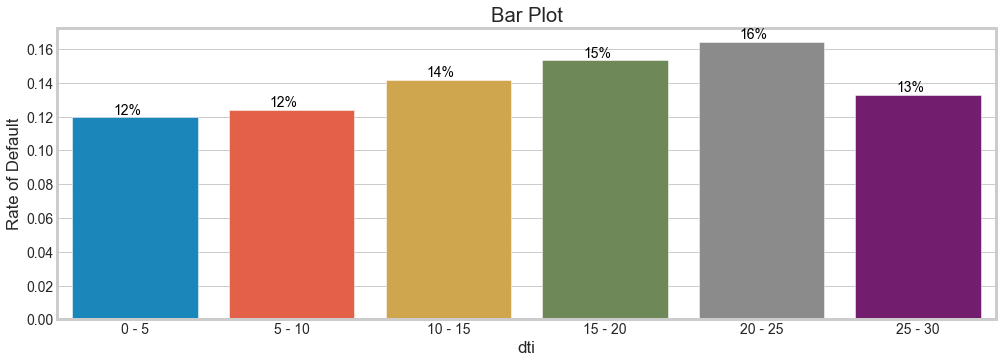

In [191]:
# Rate Of Default based on Sub grade
plot_func('cat',loan.dti_range,loan.loan_status,False,'dti','Rate of Default',None,True,0.35,None,True)

#### The Charged Off percent is high in 20 - 25 dti range followed by 15 - 20 dti range.
#### Range of rates of default = 4%

#### 6. Probabilty of charged Off based on employee Length

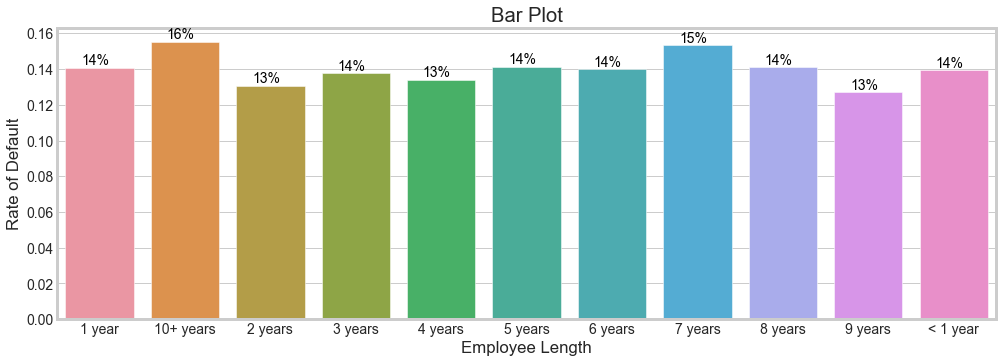

In [192]:
# Rate Of Default based on Sub grade
order = sorted(list(loan.emp_length.unique()))
plot_func('cat',loan.emp_length,loan.loan_status,False,'Employee Length','Rate of Default',None,True,0.35,order,True)

#### There is not much variation in Charged Off percentage for Employee Length
#### Range of rates of default = 3%

#### 7. Probability of Charged Off based on Annual Income

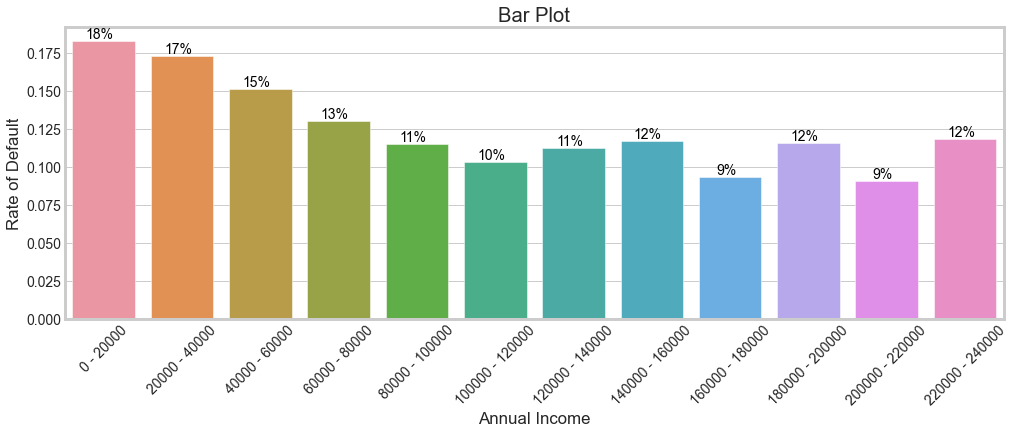

In [193]:
# Rate Of Default based on Sub grade
plot_func('cat',loan.annual_inc_range,loan.loan_status,False,'Annual Income','Rate of Default',None,True,0.35,None,True,True)

#### Borrowers in the range 0 - 20,000 annual income has the high chance (18%) of becoming default compared to other levels
#### Range of rates of default = 9%

#### 8. Probability of Charged Off based on Verification status

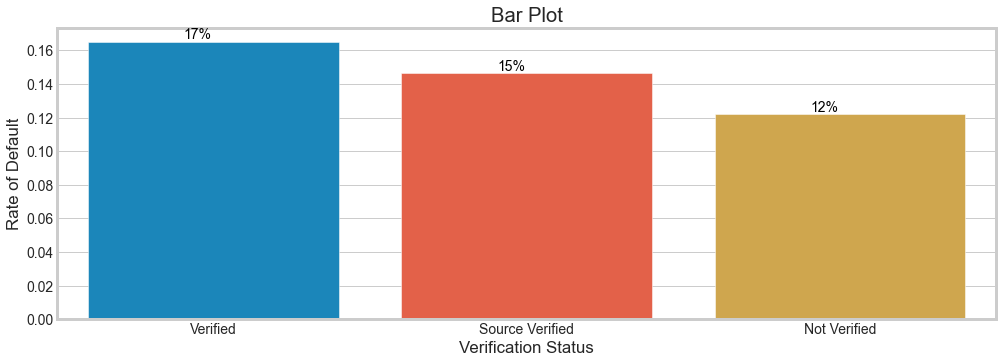

In [194]:
plot_func('cat',loan.verification_status,loan.loan_status,None,'Verification Status','Rate of Default',None,True,0.35,None,True)

#### Borrowers who are verified have higher rate of default
#### Range of rates of default = 5%

#### 9. Probability of Charged Off based on Loan to Annual Income Ratio

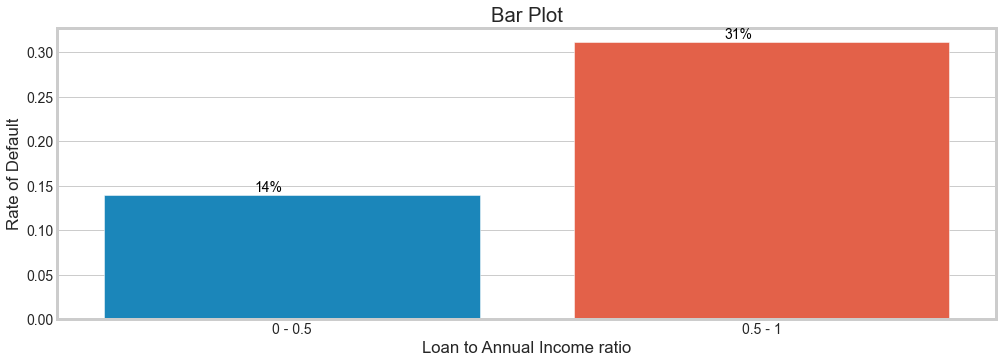

In [195]:
# Rate Of Default based on Sub grade
plot_func('cat',loan['loan_amt/ann_inc_range'],loan.loan_status,False,'Loan to Annual Income ratio','Rate of Default',None,True,0.35,None,True)

In [196]:
loan[loan['loan_amt/ann_inc_range'] == '0.75 - 0.25'].shape

(0, 26)

#### More percentage of defaulters are present in 0.5 - 1 loan amount to annual income ratio range
#### Range = 31 - 14 = 17%

#### 10. Probability of Charged Off based on term

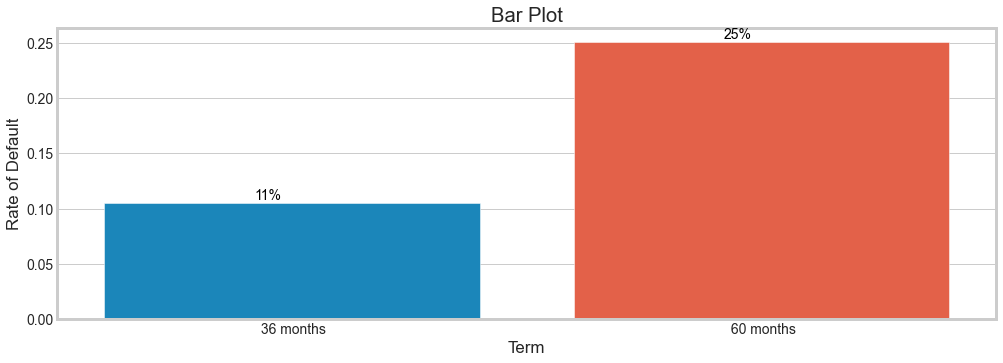

In [197]:
plot_func('cat',loan.term,loan.loan_status,None,'Term','Rate of Default',None,True,0.35,None,True)

#### Higher percentage of defaults are present in 60 months term range with 25% defaults 
#### Range  = 14 % 

#### Bivariate Analysis

#### 1. Correlation 

In [198]:
# Applying the correlation for continuous variables
loan.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate(%),installment,annual_inc,loan_status,dti,year_issued,loan_amt/ann_inc
loan_amnt,1.000000,0.981433,0.951769,0.297416,0.930419,0.414288,0.065154,0.069773,0.113797,0.631355
funded_amnt,0.981433,1.000000,0.971407,0.302049,0.956779,0.409432,0.061873,0.069824,0.127183,0.619061
funded_amnt_inv,0.951769,0.971407,1.000000,0.292968,0.923131,0.396062,0.048269,0.072681,0.214902,0.601589
int_rate(%),0.297416,0.302049,0.292968,1.000000,0.274261,0.065301,0.214491,0.110589,0.025127,0.218181
installment,0.930419,0.956779,0.923131,0.274261,1.000000,0.411283,0.030112,0.060158,0.059088,0.571102
annual_inc,0.414288,0.409432,0.396062,0.065301,0.411283,1.000000,-0.059349,-0.113813,0.037804,-0.308629
loan_status,0.065154,0.061873,0.048269,0.214491,0.030112,-0.059349,1.000000,0.042823,0.031796,0.119536
dti,0.069773,0.069824,0.072681,0.110589,0.060158,-0.113813,0.042823,1.000000,0.080065,0.141899
year_issued,0.113797,0.127183,0.214902,0.025127,0.059088,0.037804,0.031796,0.080065,1.000000,0.072391
loan_amt/ann_inc,0.631355,0.619061,0.601589,0.218181,0.571102,-0.308629,0.119536,0.141899,0.072391,1.000000


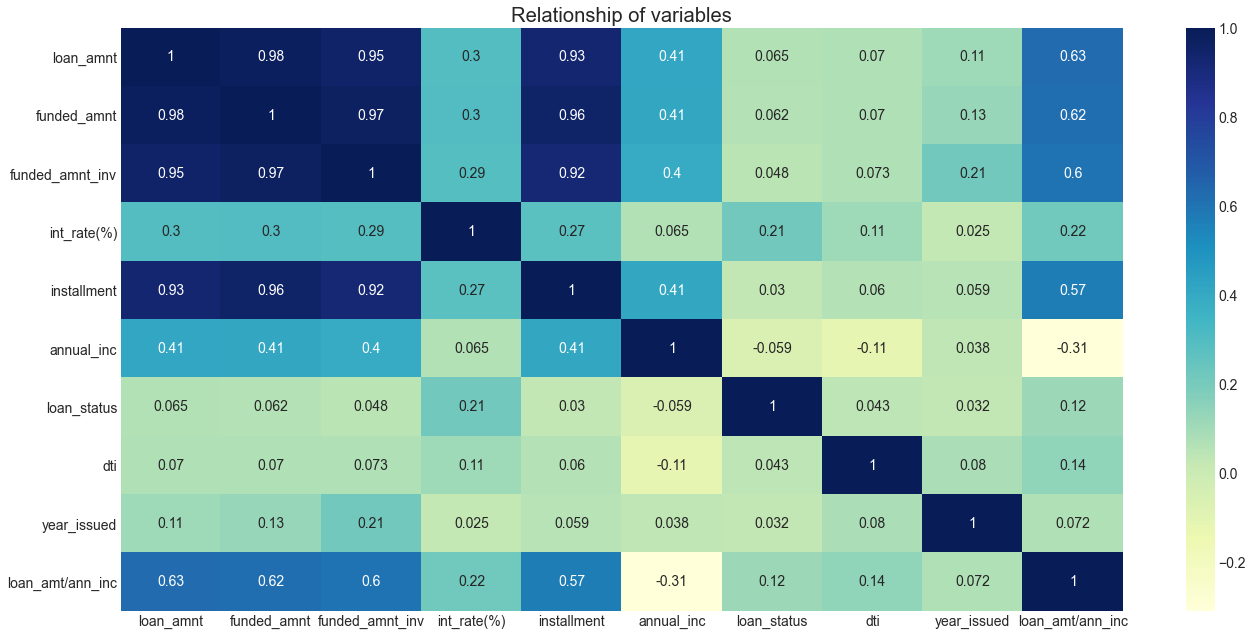

In [199]:
# Correlation of variables

plt.figure(figsize=[20,10])
sns.heatmap(loan.corr(),cmap ='YlGnBu',annot=True)
plt.title('Relationship of variables')
plt.show()


#### From the above heatmap, the variables
* loan_amnt, funded_amnt,funded_amt_inv, installment are highly correlated. So from the four variables, considering the loan amount for analysis


#### 2. Loan Amount Vs Interest Rate

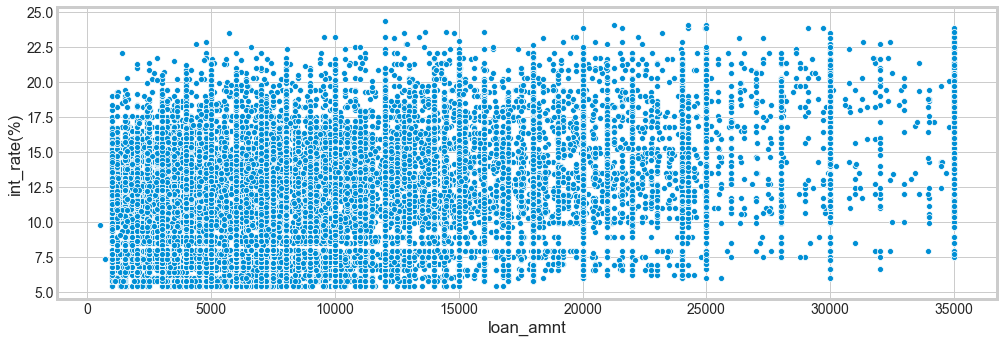

In [200]:
plt.figure(figsize=[15,5])
sns.scatterplot(loan.loan_amnt,loan['int_rate(%)'])

#### From the above scatter plot, as the loan amount increases the interest rate started increasing beyond 15000 loan amount

#### 3. Rate of default vs Verification Status vs Grade 

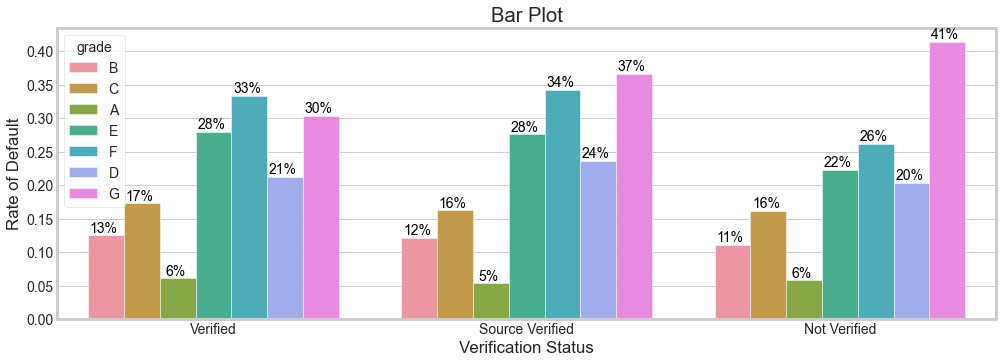

In [201]:
plot_func('cat',loan.verification_status,loan.loan_status,None,'Verification Status','Rate of Default',loan.grade,True,0.05,None,True)

#### Therefore, irrespective of the verification status, the loans of Grade G have higher percentage of getting defaulted.

#### 4. Rate of Default vs Term vs Grade

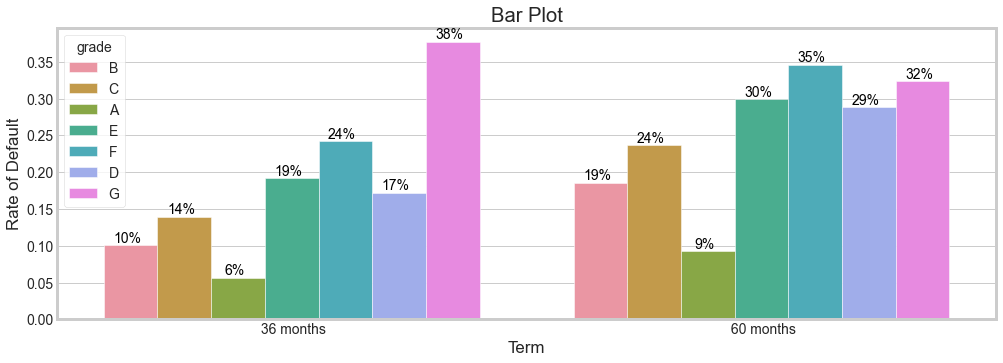

In [202]:
plot_func('cat',loan.term,loan.loan_status,None,'Term','Rate of Default',loan.grade,True,0.05,None,True)

#### The loans of Grade G in term 36 months have higher percentage of defaults compared to 60 months.

#### 5. Interest Range vs Grade vs Probability of default

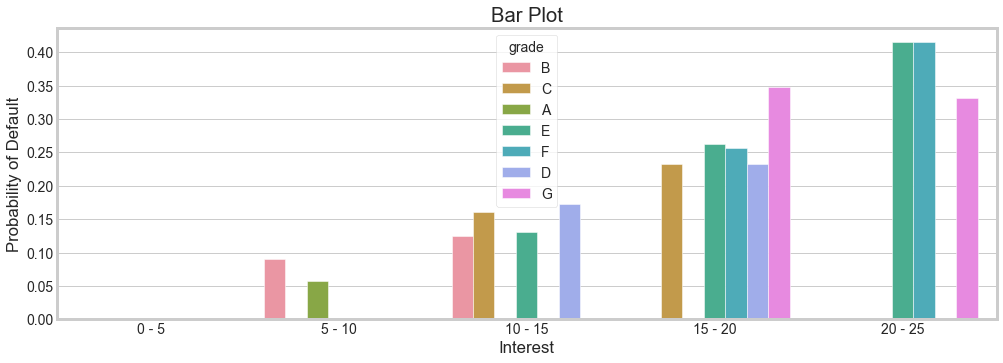

In [203]:
plot_func('cat',loan.interest_range,loan.loan_status,None,'Interest','Probability of Default',loan.grade,False,0,None,True,False)

#### From the above plot, it is evident that:
* In the interest range 20 - 25 %, E and F grade loans have the highest default percentage with more than 40 %.
* In the interest range 15 - 20 %, Grade G loans have the second highest default percentage of 35%

#### 5. Annual Income vs Grade vs Probability of default

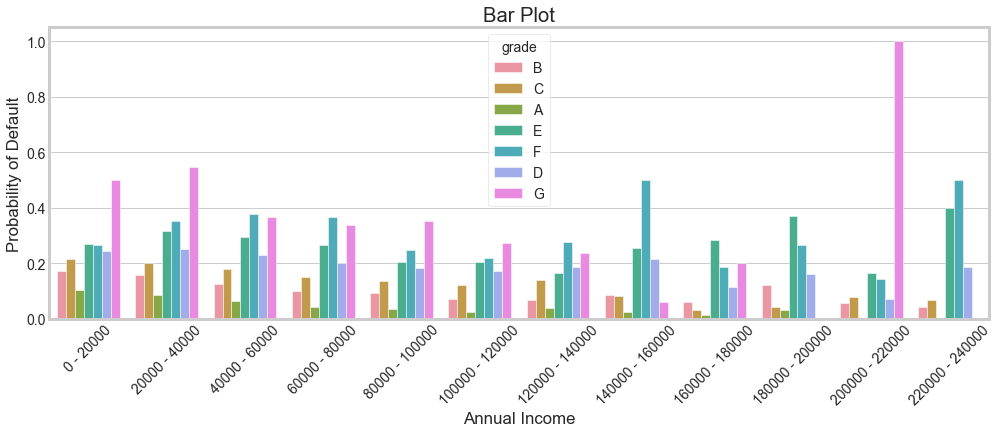

In [204]:
plot_func('cat',loan.annual_inc_range,loan.loan_status,None,'Annual Income','Probability of Default',loan.grade,False,0,None,True,True)

#### From the above plot, it is evident that:
* In the annual income range of 0.2 - 0.22 million, G grade loans have the highest default percentage of 100 %.
* Grade F loans in the annual income range 0.14 -0.16 million and 0.22 - 0.24 million have the default percentage of more than 50%.
* Grade G loans in the annual income range 0 - 20,000 and 20,000 - 40,000 have the default percentage of more than 50%

#### 6. loan amount vs Grade vs Probability of default

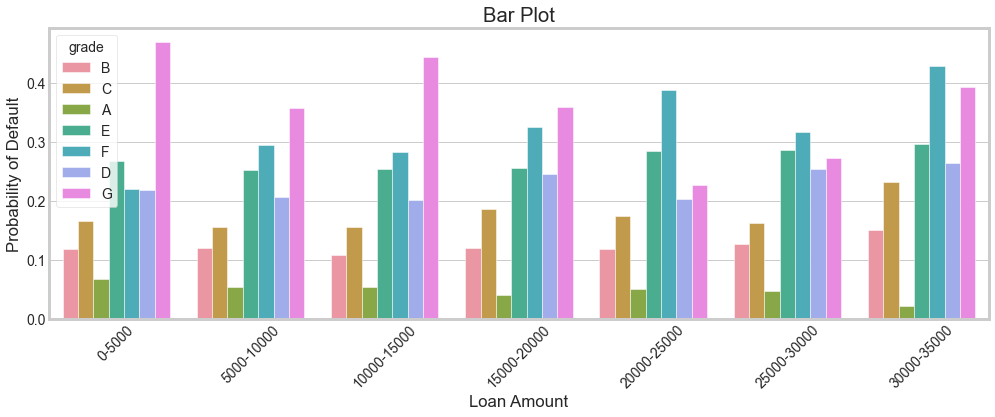

In [218]:
plot_func('cat',loan.loan_range,loan.loan_status,None,'Loan Amount','Probability of Default',loan.grade,False,0.1,None,True,True)

* G Grade loans in the loan amount range 0 - 5000 have the highest percentage of defaults with 45%
* G and F Grade loans in the loan amount range 0 - 5000 and 30,000 - 35,000 have the second (of 44%) and third (of 43%) highest percentage of defaults respectively

#### 7. dti vs Grade vs Probability of default

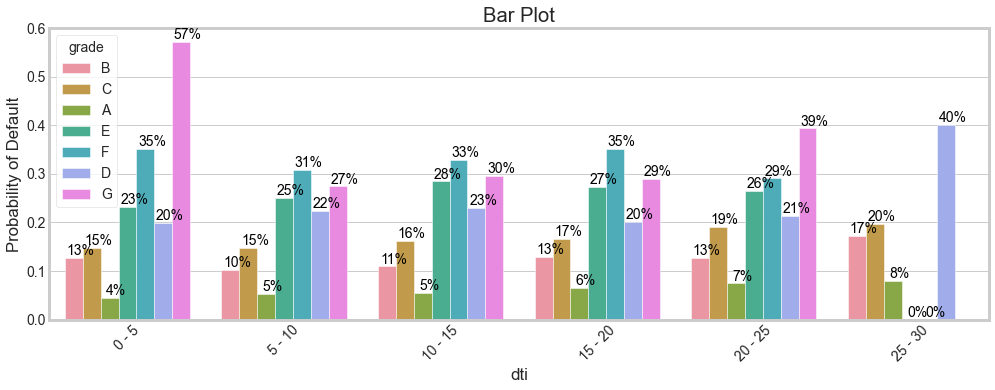

In [206]:
plot_func('cat',loan.dti_range,loan.loan_status,None,'dti','Probability of Default',loan.grade,True,0.1,None,True,True)

#### Therefore, the G grade loan borrowers within the dti range of 0-5 have the highest of 57% default rate

#### 8. Employee Length vs Grade vs Probability of default

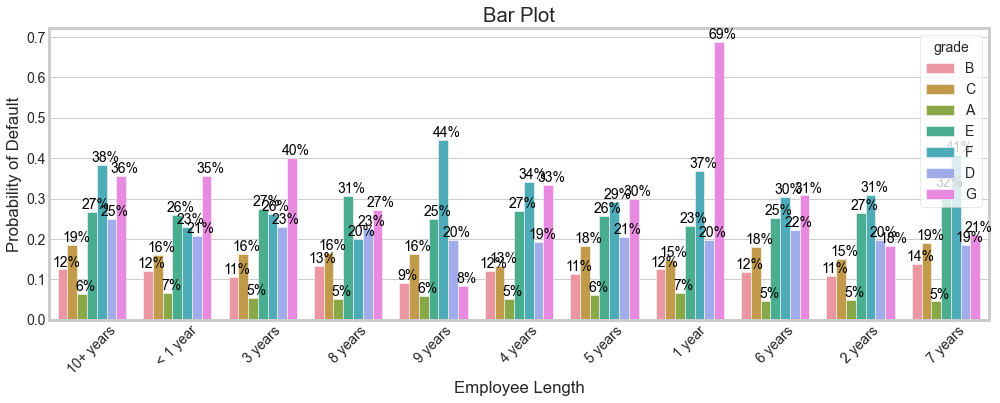

In [216]:
plot_func('cat',loan.emp_length,loan.loan_status,None,'Employee Length','Probability of Default',loan.grade,True,0.1,None,True,True)

#### Therefore, the G grade loan borrowers with 1 year employee length have the highest of 69% default rate

#### 9. Purpose vs term vs Probabililty of default

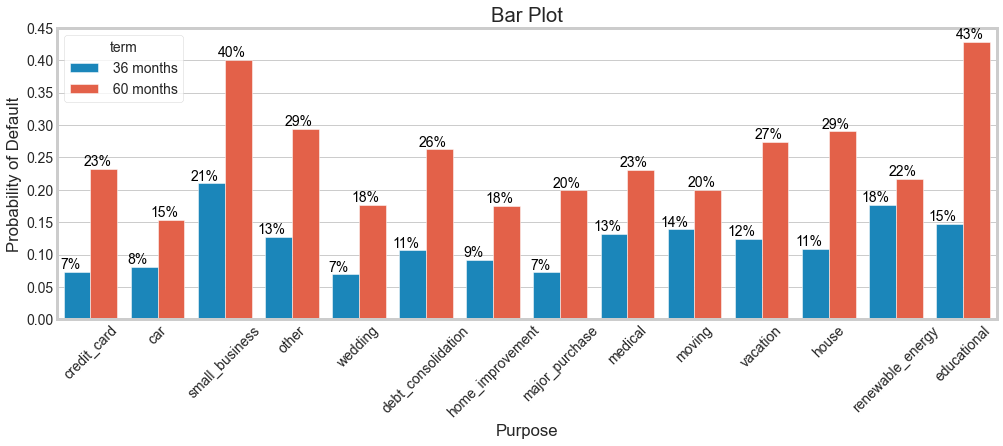

In [208]:
plot_func('cat',loan.purpose,loan.loan_status,None,'Purpose','Probability of Default',loan.term,True,0.1,None,True,True)

#### Small business and Educational loans with 60 months term are having the highest default rates with 43% and 40% respectively.

#### 10. States vs term vs Probabililty of default

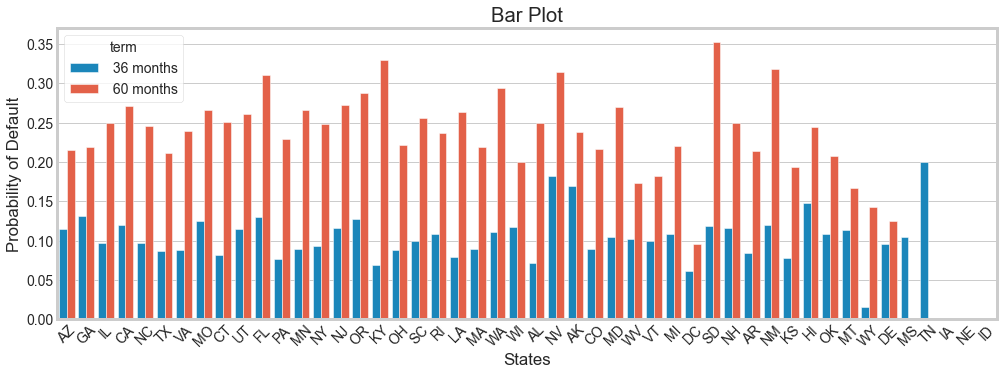

In [209]:
plot_func('cat',loan.addr_state,loan.loan_status,None,'States','Probability of Default',loan.term,False,0,None,True,True)

#### Borrowers who preferred 60 months term in the SD state have the highest of 35% defaults

#### 11. States vs Grade vs Probabililty of default

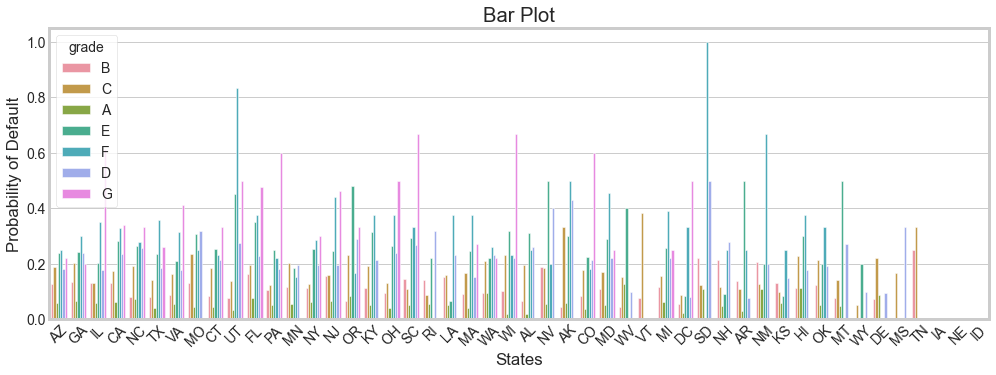

In [210]:
plot_func('cat',loan.addr_state,loan.loan_status,None,'States','Probability of Default',loan.grade,False,0,None,True,True)

#### From the above plot, the F grade loans in SD state have almost 100 % default rate

In [211]:
# Validation of above plot for SD state
print((loan.groupby(['addr_state','grade'])['grade'].count())['SD'])
print((loan[loan.loan_status == 1].groupby(['addr_state','grade'])['grade'].count())['SD'])

grade
A    18
B    18
C    16
D     2
E     3
F     2
Name: grade, dtype: int64
grade
A    2
B    4
C    2
D    1
F    2
Name: grade, dtype: int64


#### Only two applicants applied for F grade loan and both are defaulted causing the default rate to be 100%.

#### 12. Home Ownership vs Grade vs Probabililty of default

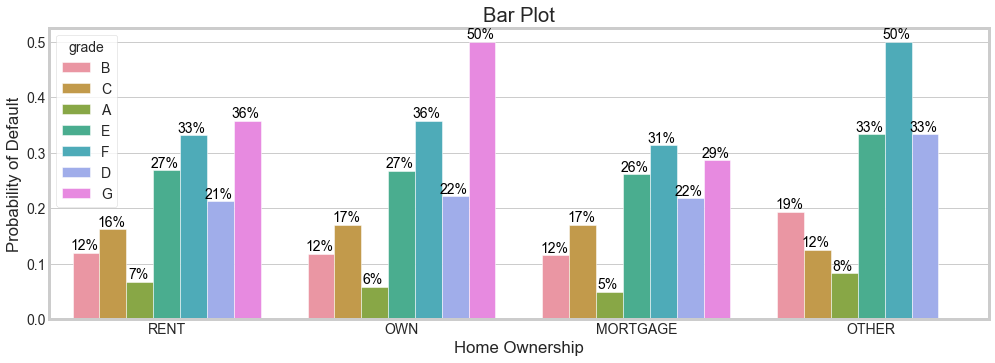

In [212]:
plot_func('cat',loan.home_ownership,loan.loan_status,None,'Home Ownership','Probability of Default',loan.grade,True,0.05,None,True)

#### Though the loan counts are high in Rent and Mortgage, the highest default rate of 50% is present in  grade G and Grade F loans with Ownerships OWN and OTHER respectively.

#### 13. Year of Issue vs Grade vs Probabililty of default

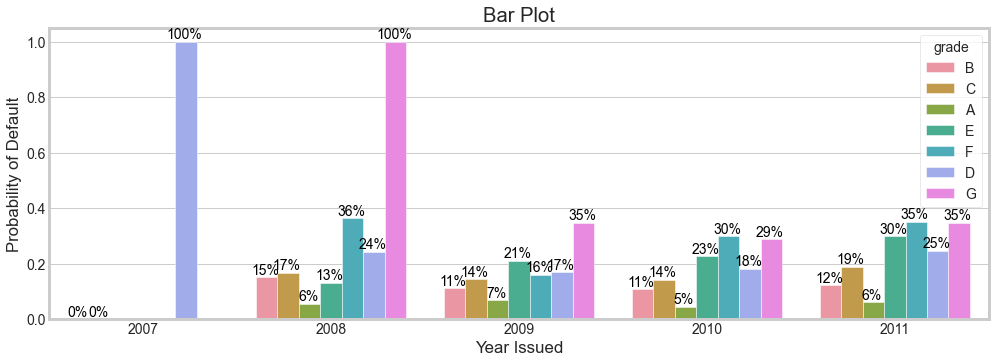

In [213]:
plot_func('cat',loan.year_issued,loan.loan_status,None,'Year Issued','Probability of Default',loan.grade,True,0.05,None,True)

#### The default rates for grade G loans is high in all the years from 2008

#### 14. Loan amount to annual income ratio vs Grade vs Probabililty of default

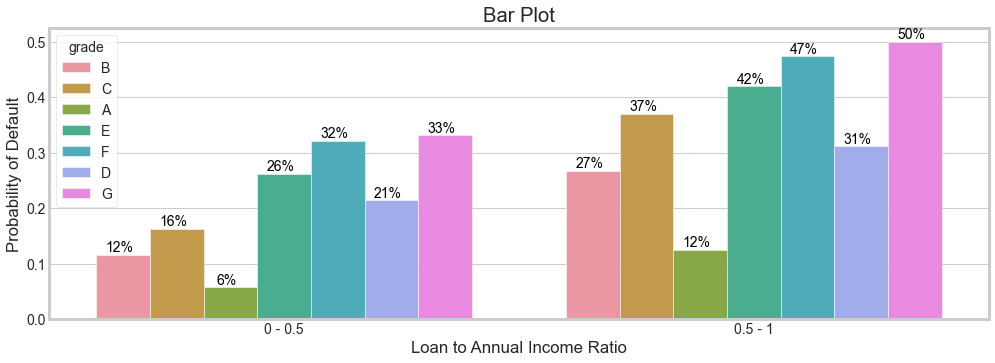

In [214]:
plot_func('cat',loan['loan_amt/ann_inc_range'],loan.loan_status,None,'Loan to Annual Income Ratio','Probability of Default',loan.grade,True,0.05,None,True)

#### Borrowers applied for G and F grade loans having 'Loan to annual income ratio' of above 0.5 have the highest of 50% and 47% default rate respectively

## Summary:

### Observations while understanding data using Univariate Analysis.

* Majority of the interest distribution is in 9 - 14.5% and the distribution is similar to normal with long tail on right.
* Most of the loan amount is distributed between 5000 to 15000 following a gamma distribution.
* Majority of the loans are borrowed by applicants with employement length more than 10 years.
* Majority of the loans are issued in the year 2011 and the application count is increasing rapidly every year.
* Majority of people prefrerring the 36 months term.
* Majority of people borrowing the loan have home Ownership as RENT or MORTGAGE.
* About 14% of the borrowers are charged Off out of total applicants.
* Majority of the borrowers earnings is in the 41000 - 82000 range following a gamma distribution.
* Majority of the loans are applied for debt_consolidation.
* Majority of the loan distribution is in between 8.3 to 18.6 dti range following a distribution similar to normal

### Observations based on Univariate Analysis for default rates

* Grades G and F have the highest percentage of defaults with 33% and 32% respectively. Rate of default for grades and Sub des   is as follows : A<B<C<D<E<F<G. So Borrower with loan grade 'G' have high chances of default.
* The state Nevada(NV) has highest Charged off borrower percentage with 22% followed by Tennessee (TN) with 21%
* The borrowers having the loan amount in 30,000 - 35,000 range have the highest of 25% chance of being Charged Off
* Applicants who borrowed the loan at the interest rate ranging 20-25% have 39% chance of getting defaulted.
* Applicants for the purpose of small business has the highest of 25% chance of getting defaulted 
* The probability of charged Off is high in 20 - 25 dti range followed by 15 - 20 dti range.
* Borrowers in the annual income range 0 - 20,000 has the highest of 18% chance of becoming default when compared with other     income levels.
* Borrowers who are verified have higher rate of default
* Highest percentage of defaulters are present in 0.5 - 1 'loan amount to annual income ratio' range
* Higher percentage of 25% defaulters are present in 60 months term range

### Observations based on Bivariate Analysis
* loan_amnt, funded_amnt,funded_amt_inv, installment are highly correlated. 
* The interest rate started increasing with loan amount beyond 15000. 

### Observations based on Bivariate Analysis for default rates

* Irrespective of the verification status, the loans of Grade G have higher percentage of getting defaulted.
* In the interest range 20 - 25 %, E and F grade loans have the highest of more than 40% defaults.
* In the interest range 15 - 20 %, Grade G loans have the second highest of 35% defaults.
* In the annual income range of 0.2 - 0.22 million USD, G grade loans have the highest default percentage of 100 %.
* Grade F loans in the annual income range of 0.14 -0.16 million USD and 0.22 - 0.24 million USD have the default percentage of more than 50%.
* G Grade loans in the annual income range 0 - 20,000 USD and 20,000 - 40,000 USD have the default percentage of more than 50%
* G Grade loans in the loan amount range 0 - 5000 have the highest of 45% defaults.
* G and F Grade loans in the loan amount range 0 - 5000 and 30,000 - 35,000 have the second (of 44%) and third (of 43%) highest percentage of defaults respectively.
* G grade loan borrowers within the dti range of 0-5 have the highest of 57% default rate.
* G grade loan borrowers with 1 year employee length have the highest of 69% default rate.
* Small business and Educational loans with 60 months term are having the highest default rates with 43% and 40% respectively.
* Borrowers who preferred 60 months term in the SD state have the highest of 35% defaults.
* The F grade loans in SD state have almost 100 % default rate and it is due to only two borrowers are given F grade loans in     the SD state and   both are defaulted causing the default rate to be 100%.
* Though the loan counts are high in Rent and Mortgage, the highest default rate of 50% is present in  grade G and Grade F       loans with Ownerships `OWN` and `OTHER` respectively.
* The default rates for grade G loans is high in all the years from 2008
* Borrowers with G and F grade loans and 'Loan to annual income ratio' of above 0.5 have the highest of 50% and 47% default   rate respectively


### Conclusions:

#### Major predictors of Default are:
1. Interest Rate
2. Grade or Subgrade
3. State
4. Purpose
5. Loan Amount to Annual income ratio
7. Term
8. Loan Amount